### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

#### 1. Read in the `coupons.csv` file.




In [109]:
df = pd.read_csv('data/coupons.csv')

In [110]:
pd.set_option('display.max_columns', None)
df.sample(5)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
12337,Home,Kid(s),Sunny,55,10PM,Restaurant(20-50),2h,Male,31,Married partner,1,Some college - no degree,Computer & Mathematical,$37500 - $49999,NaN,never,never,1~3,1~3,1~3,1,1,0,0,1,1
1958,Work,Alone,Sunny,55,7AM,Bar,1d,Male,41,Married partner,1,Graduate degree (Masters or Doctorate),Education&Training&Library,$50000 - $62499,NaN,less1,4~8,4~8,1~3,less1,1,1,1,0,1,1
2932,Work,Alone,Sunny,55,7AM,Coffee House,2h,Female,31,Divorced,1,High School Graduate,Business & Financial,$25000 - $37499,NaN,1~3,less1,1~3,less1,4~8,1,1,1,0,1,0
11569,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Male,36,Unmarried partner,0,Some college - no degree,Construction & Extraction,$25000 - $37499,NaN,never,4~8,4~8,less1,less1,1,0,0,0,1,1
5476,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,1~3,1~3,1,0,0,1,0,0


#### 2. Investigate the dataset for missing or problematic data.

In [111]:
df.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [112]:
df.isna().mean().multiply(100).round(2)

destination              0.00
passanger                0.00
weather                  0.00
temperature              0.00
time                     0.00
coupon                   0.00
expiration               0.00
gender                   0.00
age                      0.00
maritalStatus            0.00
has_children             0.00
education                0.00
occupation               0.00
income                   0.00
car                     99.15
Bar                      0.84
CoffeeHouse              1.71
CarryAway                1.19
RestaurantLessThan20     1.02
Restaurant20To50         1.49
toCoupon_GEQ5min         0.00
toCoupon_GEQ15min        0.00
toCoupon_GEQ25min        0.00
direction_same           0.00
direction_opp            0.00
Y                        0.00
dtype: float64

#### 3. Decide what to do about your missing data -- drop, replace, other...

I decided to drop the car column since it was **99.15%** missing values and not really useful for this data analysis.

The other columns that had missing values (Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20to50) were **less than 2%** of the total number of values in their respective columns and I didn't have a good way to impute these missing values, so I decided to drop these NaN rows.

In [113]:
df_cleaned = df.drop('car', axis = 1)
df_cleaned.dropna(inplace = True)
df_cleaned.isna().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

#### 4. What proportion of the total observations chose to accept the coupon?



**56.93%** of drivers chose to accept their coupon.

In [114]:
df_cleaned.shape[0]

12079

In [115]:
df_cleaned['Y'].value_counts()

Y
1    6877
0    5202
Name: count, dtype: int64

In [116]:
Proportion = 6877/12079 * 100
print(round(Proportion, 2))

56.93


#### 5. Use a bar plot to visualize the `coupon` column.

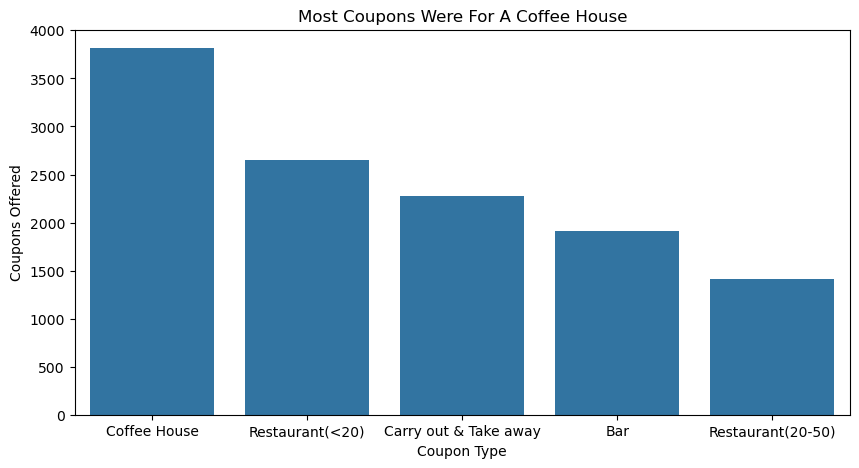

In [117]:
coupon_data = df_cleaned['coupon'].value_counts()
plt.figure(figsize = (10,5))
sns.barplot(data = coupon_data)
plt.title('Most Coupons Were For A Coffee House')
plt.xlabel('Coupon Type')
plt.ylabel('Coupons Offered');

#### 6. Use a histogram to visualize the temperature column.

Not really sure why we would want to use a histogram here since the temperature column isn't a continuous variable (it's limited to three values: 30, 55, 80), so for this reason I am setting parameter "discrete = True" in my histogram below.

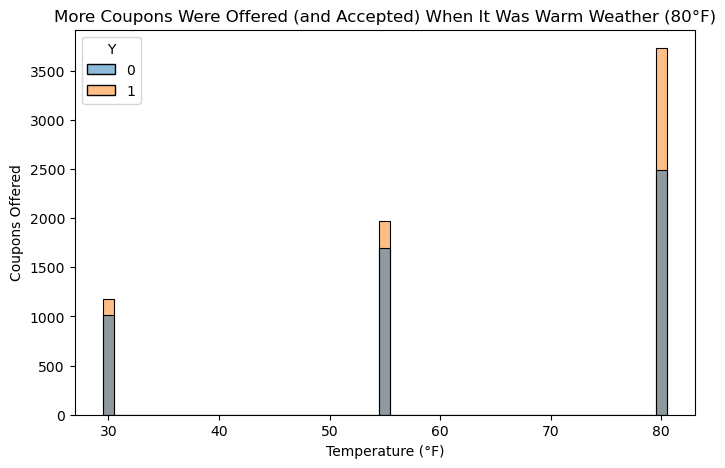

In [118]:
# included hue = 'Y' to see if there was a difference in coupons accepted depending on temperature
plt.figure(figsize = (8,5))
plot = sns.histplot(data = df_cleaned, x = 'temperature', discrete = True, hue = 'Y')
degree_symbol = chr(176)
plt.title('More Coupons Were Offered (and Accepted) When It Was Warm Weather (80' + degree_symbol + 'F)')
plt.xlabel('Temperature ' + '(' + degree_symbol + 'F)')
plt.ylabel('Coupons Offered');

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

#### 1. Create a new `DataFrame` that contains just the bar coupons.


In [119]:
df_bar = df_cleaned.query('coupon == "Bar"')
df_bar.sample(5)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,0,Some college - no degree,Student,$12500 - $24999,never,4~8,1~3,1~3,never,1,0,0,0,1,0
10244,Work,Alone,Sunny,30,7AM,Bar,1d,Female,below21,Unmarried partner,0,High School Graduate,Student,Less than $12500,never,4~8,1~3,4~8,less1,1,1,0,1,0,0
9214,Home,Alone,Rainy,55,6PM,Bar,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,4~8,4~8,less1,1,1,1,0,1,0
12525,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,21,Unmarried partner,0,High School Graduate,Food Preparation & Serving Related,$12500 - $24999,1~3,never,gt8,4~8,1~3,1,1,0,0,1,1
9013,Home,Alone,Rainy,55,6PM,Bar,1d,Male,below21,Single,0,Some college - no degree,Food Preparation & Serving Related,$87500 - $99999,less1,gt8,1~3,1~3,less1,1,1,1,0,1,0


#### 2. What proportion of bar coupons were accepted?


**41.19%** of bar coupons were accepted by drivers.

In [120]:
df_bar.shape[0]

1913

In [121]:
df_bar['Y'].value_counts()

Y
0    1125
1     788
Name: count, dtype: int64

In [122]:
Proportion = 788/1913 * 100
print(round(Proportion, 2))

41.19


#### 3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


Drivers who went to a **bar 3 or fewer** times a month had an acceptance rate of **37.27%**.  
Drivers who went to a **bar more than 3** times a month had an acceptance rate of **76.17%**.  
So the acceptance rate was much **higher** for those who went **more than 3** times a month

In [123]:
df_bar['Bar'].unique()

array(['never', 'less1', '1~3', 'gt8', '4~8'], dtype=object)

In [124]:
fewer = ['never','less1','1~3']
more = ['4~8','gt8']

In [125]:
df_bar.query('Bar in @fewer')['Y'].value_counts(normalize = True).multiply(100).round(2)

Y
0    62.73
1    37.27
Name: proportion, dtype: float64

In [126]:
df_bar.query('Bar in @more')['Y'].value_counts(normalize = True).multiply(100).round(2)

Y
1    76.17
0    23.83
Name: proportion, dtype: float64

#### 4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


Drivers who go to a **bar more than once** a month AND are **older than 25** had an acceptance rate of **68.98%**.  
So their acceptance rate was higher than the overall **41.19%** bar coupon acceptance rate seen in question 2 above.

In [127]:
df_bar['age'].unique()

array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

In [128]:
older_than_25 = ['26', '31', '36', '41', '46', '50plus']
more_than_once = ['1~3', '4~8', 'gt8']

In [129]:
df_bar.query('Bar in @more_than_once & age in @older_than_25')['Y'].value_counts()

Y
1    278
0    125
Name: count, dtype: int64

In [130]:
df_bar.query('Bar in @more_than_once & age in @older_than_25')['Y'].value_counts(normalize = True).multiply(100).round(2)

Y
1    68.98
0    31.02
Name: proportion, dtype: float64

#### 5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


Drivers who go to **bars more than once** a month AND had **passengers other than a kid** AND had **occupations other than farming, fishing, or forestry** had an acceptance rate of **71.43%**.  
So their acceptance rate was significantly higher than the overall **41.19%** bar coupon acceptance rate seen in question 2 above.

In [131]:
df_bar['passanger'].unique()

array(['Friend(s)', 'Alone', 'Kid(s)', 'Partner'], dtype=object)

In [132]:
df_bar['occupation'].unique()

array(['Architecture & Engineering', 'Student',
       'Education&Training&Library', 'Unemployed', 'Healthcare Support',
       'Healthcare Practitioners & Technical', 'Sales & Related',
       'Management', 'Arts Design Entertainment Sports & Media',
       'Computer & Mathematical', 'Life Physical Social Science',
       'Personal Care & Service', 'Office & Administrative Support',
       'Construction & Extraction', 'Legal', 'Retired',
       'Community & Social Services', 'Installation Maintenance & Repair',
       'Transportation & Material Moving', 'Business & Financial',
       'Protective Service', 'Food Preparation & Serving Related',
       'Production Occupations',
       'Building & Grounds Cleaning & Maintenance',
       'Farming Fishing & Forestry'], dtype=object)

In [133]:
# made sure to include "Alone" as well in the passenger filter since being alone would indicate not having any passengers
df_bar.query('(Bar in @more_than_once) & (passanger != ["Kid(s)", "Alone"]) & (occupation != "Farming Fishing & Forestry")')['Y'].value_counts()

Y
1    135
0     54
Name: count, dtype: int64

In [134]:
df_bar.query('(Bar in @more_than_once) & (passanger != ["Kid(s)", "Alone"]) & (occupation != "Farming Fishing & Forestry")')['Y'].value_counts(normalize = True).multiply(100).round(2)

Y
1    71.43
0    28.57
Name: proportion, dtype: float64

#### 6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



Looking at these 3 conditions all together, the acceptance rate among the drivers was **56.59%**, so still higher than the overall **41.19%** seen in question 2.  
But if we look at each of these 3 groups individually:
- Drivers who go to **bars more than once** a month AND had **passengers other than a kid** AND were **not widowed** had an acceptance rate of **71.43%**
- Drivers who go to **bars more than once** a month AND are **younger than 30** had an acceptance rate of **71.95%**
- Drivers who go to **cheap restaurants more than 4 times a month** AND have **income less than $50K** had an acceptance rate of **45.65%**

In [135]:
df_bar['maritalStatus'].unique()

array(['Single', 'Married partner', 'Unmarried partner', 'Divorced',
       'Widowed'], dtype=object)

In [136]:
df_bar['RestaurantLessThan20'].unique()

array(['4~8', '1~3', 'less1', 'gt8', 'never'], dtype=object)

In [137]:
df_bar['income'].unique()

array(['$62500 - $74999', '$12500 - $24999', '$75000 - $87499',
       '$50000 - $62499', '$37500 - $49999', '$25000 - $37499',
       '$100000 or More', '$87500 - $99999', 'Less than $12500'],
      dtype=object)

In [138]:
more_than_4 = ['4~8', 'gt8']
younger_than_30 = ['below21', '21', '26']
income_below_50000 = ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']

In [139]:
filtered_group = df_bar.query(
    '(Bar in @more_than_once) & (passanger != ["Kid(s)", "Alone"]) & (maritalStatus != "Widowed") |'
    '(Bar in @more_than_once) & (age in @younger_than_30) |'
    '(RestaurantLessThan20 in @more_than_4) & (income in @income_below_50000)'
)

In [140]:
filtered_group['Y'].value_counts()

Y
1    360
0    275
Name: count, dtype: int64

In [141]:
filtered_group['Y'].value_counts(normalize = True).multiply(100).round(2)

Y
1    56.69
0    43.31
Name: proportion, dtype: float64

In [142]:
df_bar.query('(Bar in @more_than_once) & (passanger != ["Kid(s)", "Alone"]) & (maritalStatus != "Widowed")')['Y'].value_counts(normalize = True).multiply(100).round(2)

Y
1    71.43
0    28.57
Name: proportion, dtype: float64

In [143]:
df_bar.query('(Bar in @more_than_once) & (age in @younger_than_30)')['Y'].value_counts(normalize = True).multiply(100).round(2)

Y
1    71.95
0    28.05
Name: proportion, dtype: float64

In [144]:
df_bar.query('(RestaurantLessThan20 in @more_than_4) & (income in @income_below_50000)')['Y'].value_counts(normalize = True).multiply(100).round(2)

Y
0    54.35
1    45.65
Name: proportion, dtype: float64

#### 7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

I would hypothesize that drivers who go to bars more than once a month are much more likely to accept the bar coupons. This appeared to be the strongest variable affecting the acceptance rate.

Once it was introduced in question 3, it clearly showed that those who went to bars more often had a much higher acceptance rate of 76.17%. Other variables like having a passenger in the car and age of the driver seemed to also have an impact on the acceptance rate, but not as strongly as how many times the driver went to bars in a month (decreased to 68.98% in question 4 with the age filter to be older than 25, then up to 71.43% in question 5 and 6 when the age filter was replaced by having a passenger other than a kid in the car)

Occupation and marital status didn't appear to have much of an impact on the acceptance rate as we can interestingly see the same acceptance rate of 71.43% when occupation was not farming, fishing, or forestry vs when the driver wasn't a widow.

As soon as we remove the filter about how often the driver goes to bars in a month, we see the acceptance rate drop down to 45.65% at the end of question 6, sort of confirming that the variable having the biggest impact is how often the driver goes to bars in a month.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

#### Let's explore the coffee coupons
- Destination (does no urgent place has a higher acceptance rate than home or work?)
- Expiration (does it make a difference if the coupon expires in 2h or 1d?)
- Does the driving direction make a difference? (higher acceptance rate if same direction vs opposite direction, or no difference?)
- What about Destination and Driving Direction together?
- Does gender make a difference?

In [145]:
df_coffee = df_cleaned.query('coupon == "Coffee House"')
coffee_columns = ['destination','coupon','expiration','gender','direction_same','direction_opp','Y']
df_coffee[coffee_columns].sample(5)

,destination,coupon,expiration,gender,direction_same,direction_opp,Y
2022,Home,Coffee House,2h,Female,0,1,0
936,No Urgent Place,Coffee House,2h,Female,0,1,1
1002,No Urgent Place,Coffee House,2h,Female,0,1,0
2597,Home,Coffee House,2h,Male,0,1,0
5408,Work,Coffee House,2h,Female,1,0,0


In [146]:
df_coffee.shape

(3816, 25)

#### What is the overall coffee coupon acceptance rate?

**49.63%** of coffee coupons were accepted by drivers.

In [147]:
df_coffee['Y'].value_counts(normalize = True).multiply(100).round(2)

Y
0    50.37
1    49.63
Name: proportion, dtype: float64

#### How does the acceptance rate of drivers with no urgent destination compare to those going to work or home?

Drivers with no urgent place to be had a higher acceptance rate of **57.82%**  
Drivers going to work had a lower acceptance rate of **44%**  
Drivers heading home had the lowest acceptance rate of **36.26%**

In [148]:
df_coffee['destination'].unique()

array(['No Urgent Place', 'Home', 'Work'], dtype=object)

In [149]:
df_coffee.query('destination == "No Urgent Place"')['Y'].value_counts(normalize = True).multiply(100).round(2)

Y
1    57.82
0    42.18
Name: proportion, dtype: float64

In [150]:
df_coffee.query('destination != "No Urgent Place"')['Y'].value_counts(normalize = True).multiply(100).round(2)

Y
0    59.9
1    40.1
Name: proportion, dtype: float64

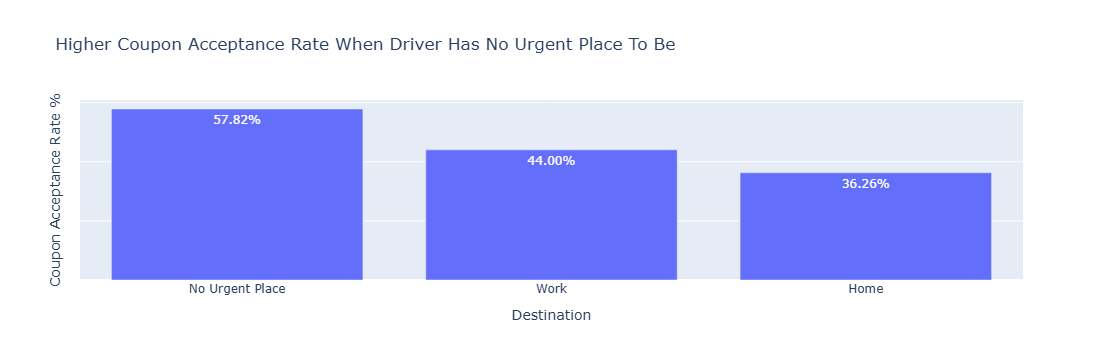

In [151]:
destination_rates = df_coffee.groupby('destination')['Y'].mean().round(4).sort_values(ascending = False)
fig = px.bar(destination_rates, text_auto = '.2%', labels = {'value':'Coupon Acceptance Rate %', 'destination':'Destination'}, title = 'Higher Coupon Acceptance Rate When Driver Has No Urgent Place To Be')
fig.layout.update(showlegend = False)
fig.update_yaxes(showticklabels = False)
fig.show()

#### Does the driving direction have any impact for drivers going to work or home?

Yes! When the drivers were heading in the same direction as their work or home, they had much higher acceptance rates.  
Drivers going to work with coupons for coffee shops in the same direction had a **56.93%** acceptance rate vs **32.91%** for coffee shops in the other direction.  
Drivers heading home with coupons for coffee shops in the same direction had a **47.12%** acceptance rate vs **30.38%** for coffee shops in the other direction.  


In [152]:
df_coffee.query('destination != "No Urgent Place"').groupby(['destination','direction_same'])['Y'].mean().multiply(100).round(2).reset_index()

,destination,direction_same,Y
0,Home,0,30.38
1,Home,1,47.12
2,Work,0,32.91
3,Work,1,56.93


#### Do coupons with a longer expiration date have higher acceptance rates?

Yes, the coffee coupons with 1 day expirations had higher acceptance rates than those with 2 hour expirations.  
1 day expiration coupons had an acceptance rate of **58.06%**.  
2 hour expiration coupons had an acceptance rate of **42.91%**.

In [153]:
df_coffee['expiration'].unique()

array(['2h', '1d'], dtype=object)

In [154]:
df_coffee.groupby('expiration')['Y'].mean().multiply(100).round(2).reset_index()

,expiration,Y
0,1d,58.06
1,2h,42.91


#### Does gender appear to make any difference?

No, the coffee coupon acceptance rates between males and females was nearly equal.  
Males had an acceptance rate of **50.19%** and females had an acceptance rate of **49.11%**.

In [155]:
df_coffee.groupby('gender')['Y'].mean().multiply(100).round(2).reset_index()

,gender,Y
0,Female,49.11
1,Male,50.19
